In [38]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
# rcParams['font.family'] = 'serif'
"""默认不显示支持中文，现在设置格式使其可以显示中文"""
font = {"family":"MicroSoft YaHei",
       "weight":"bold",
       "size":"9"}
matplotlib.rc("font", **font)

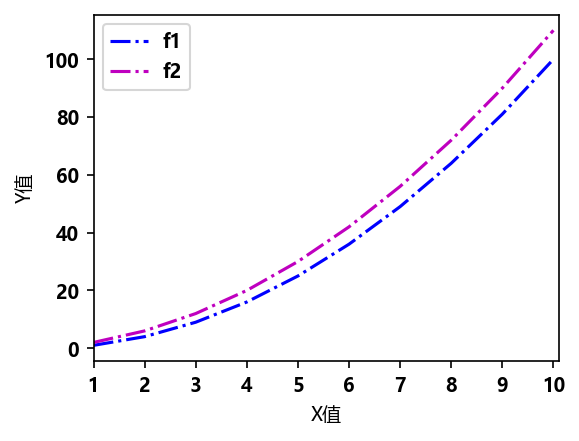

In [27]:
'''
    图片1行1列
    dpi越高，最后生成的图片越清晰
'''
fig, axs = plt.subplots(1,1, figsize=(4, 3), dpi=150)

X = list(range(1, 11, 1)) # 设置X轴范围[1, 10]
f1 = lambda x: x**2  # 曲线1
f2 = lambda x: x**2 + x  # 曲线2 
Fs = [f1, f2]
Ys = [[] for _ in range(2)]
for idx, f in enumerate(Fs):
    for x in X:
        Ys[idx].append(f(x))

fmts=('b-.', 'm-.') # 设置线条格式
for y, fmt in zip(Ys, fmts):
    plt.plot(X, y, fmt)
plt.xlim(1,10.1)
plt.xticks(X) # 用于设置X轴上要显示的刻度值
plt.xlabel("X值")
plt.ylabel("Y值")
legend = ["f1", "f2"]
axs.legend(legend)
plt.savefig("./total_loss.png", bbox_inches = 'tight') # 这里有横轴截断问题
# 展示图表
plt.show()

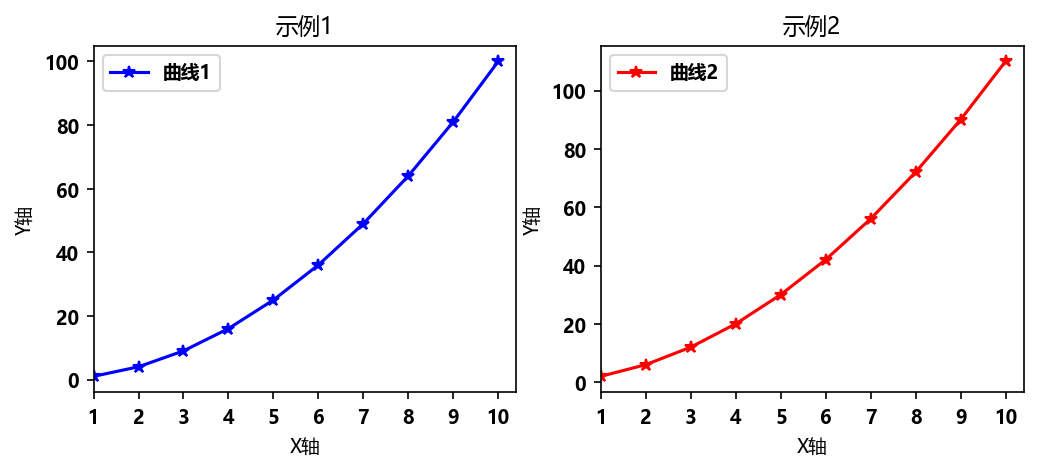

In [28]:
# 设置一行2列
fig, axs = plt.subplots(1,2, figsize=(8, 3), dpi=150)
x = range(1, 11, 1) # 设置X轴范围

X = list(range(1, 11, 1)) # 设置X轴范围[1, 10]
f1 = lambda x: x**2  # 曲线1
f2 = lambda x: x**2 + x  # 曲线2 
Fs = [f1, f2]
Ys = [[] for _ in range(2)]
for idx, f in enumerate(Fs):
    for x in X:
        Ys[idx].append(f(x))

def myPlot(X, Y, ax, fmt, title, x_label, y_label, legend):
    ax.plot(X, Y, fmt, marker='*')
    ax.set_xlim(X[0], X[-1]+0.4) # 设置X轴范围
    ax.set_xticks(X) # 用于设置X轴上要显示的刻度值
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(legend)
    ax.set_title(title)

myPlot(X, Ys[0], axs[0], 'b-', '示例1', 'X轴', 'Y轴', ["曲线1"])
myPlot(X, Ys[1], axs[1], 'r-', '示例2', 'X轴', 'Y轴', ["曲线2"])
plt.savefig("./2.png", bbox_inches = 'tight') # 这里有横轴截断问题
# 展示图表
plt.show()

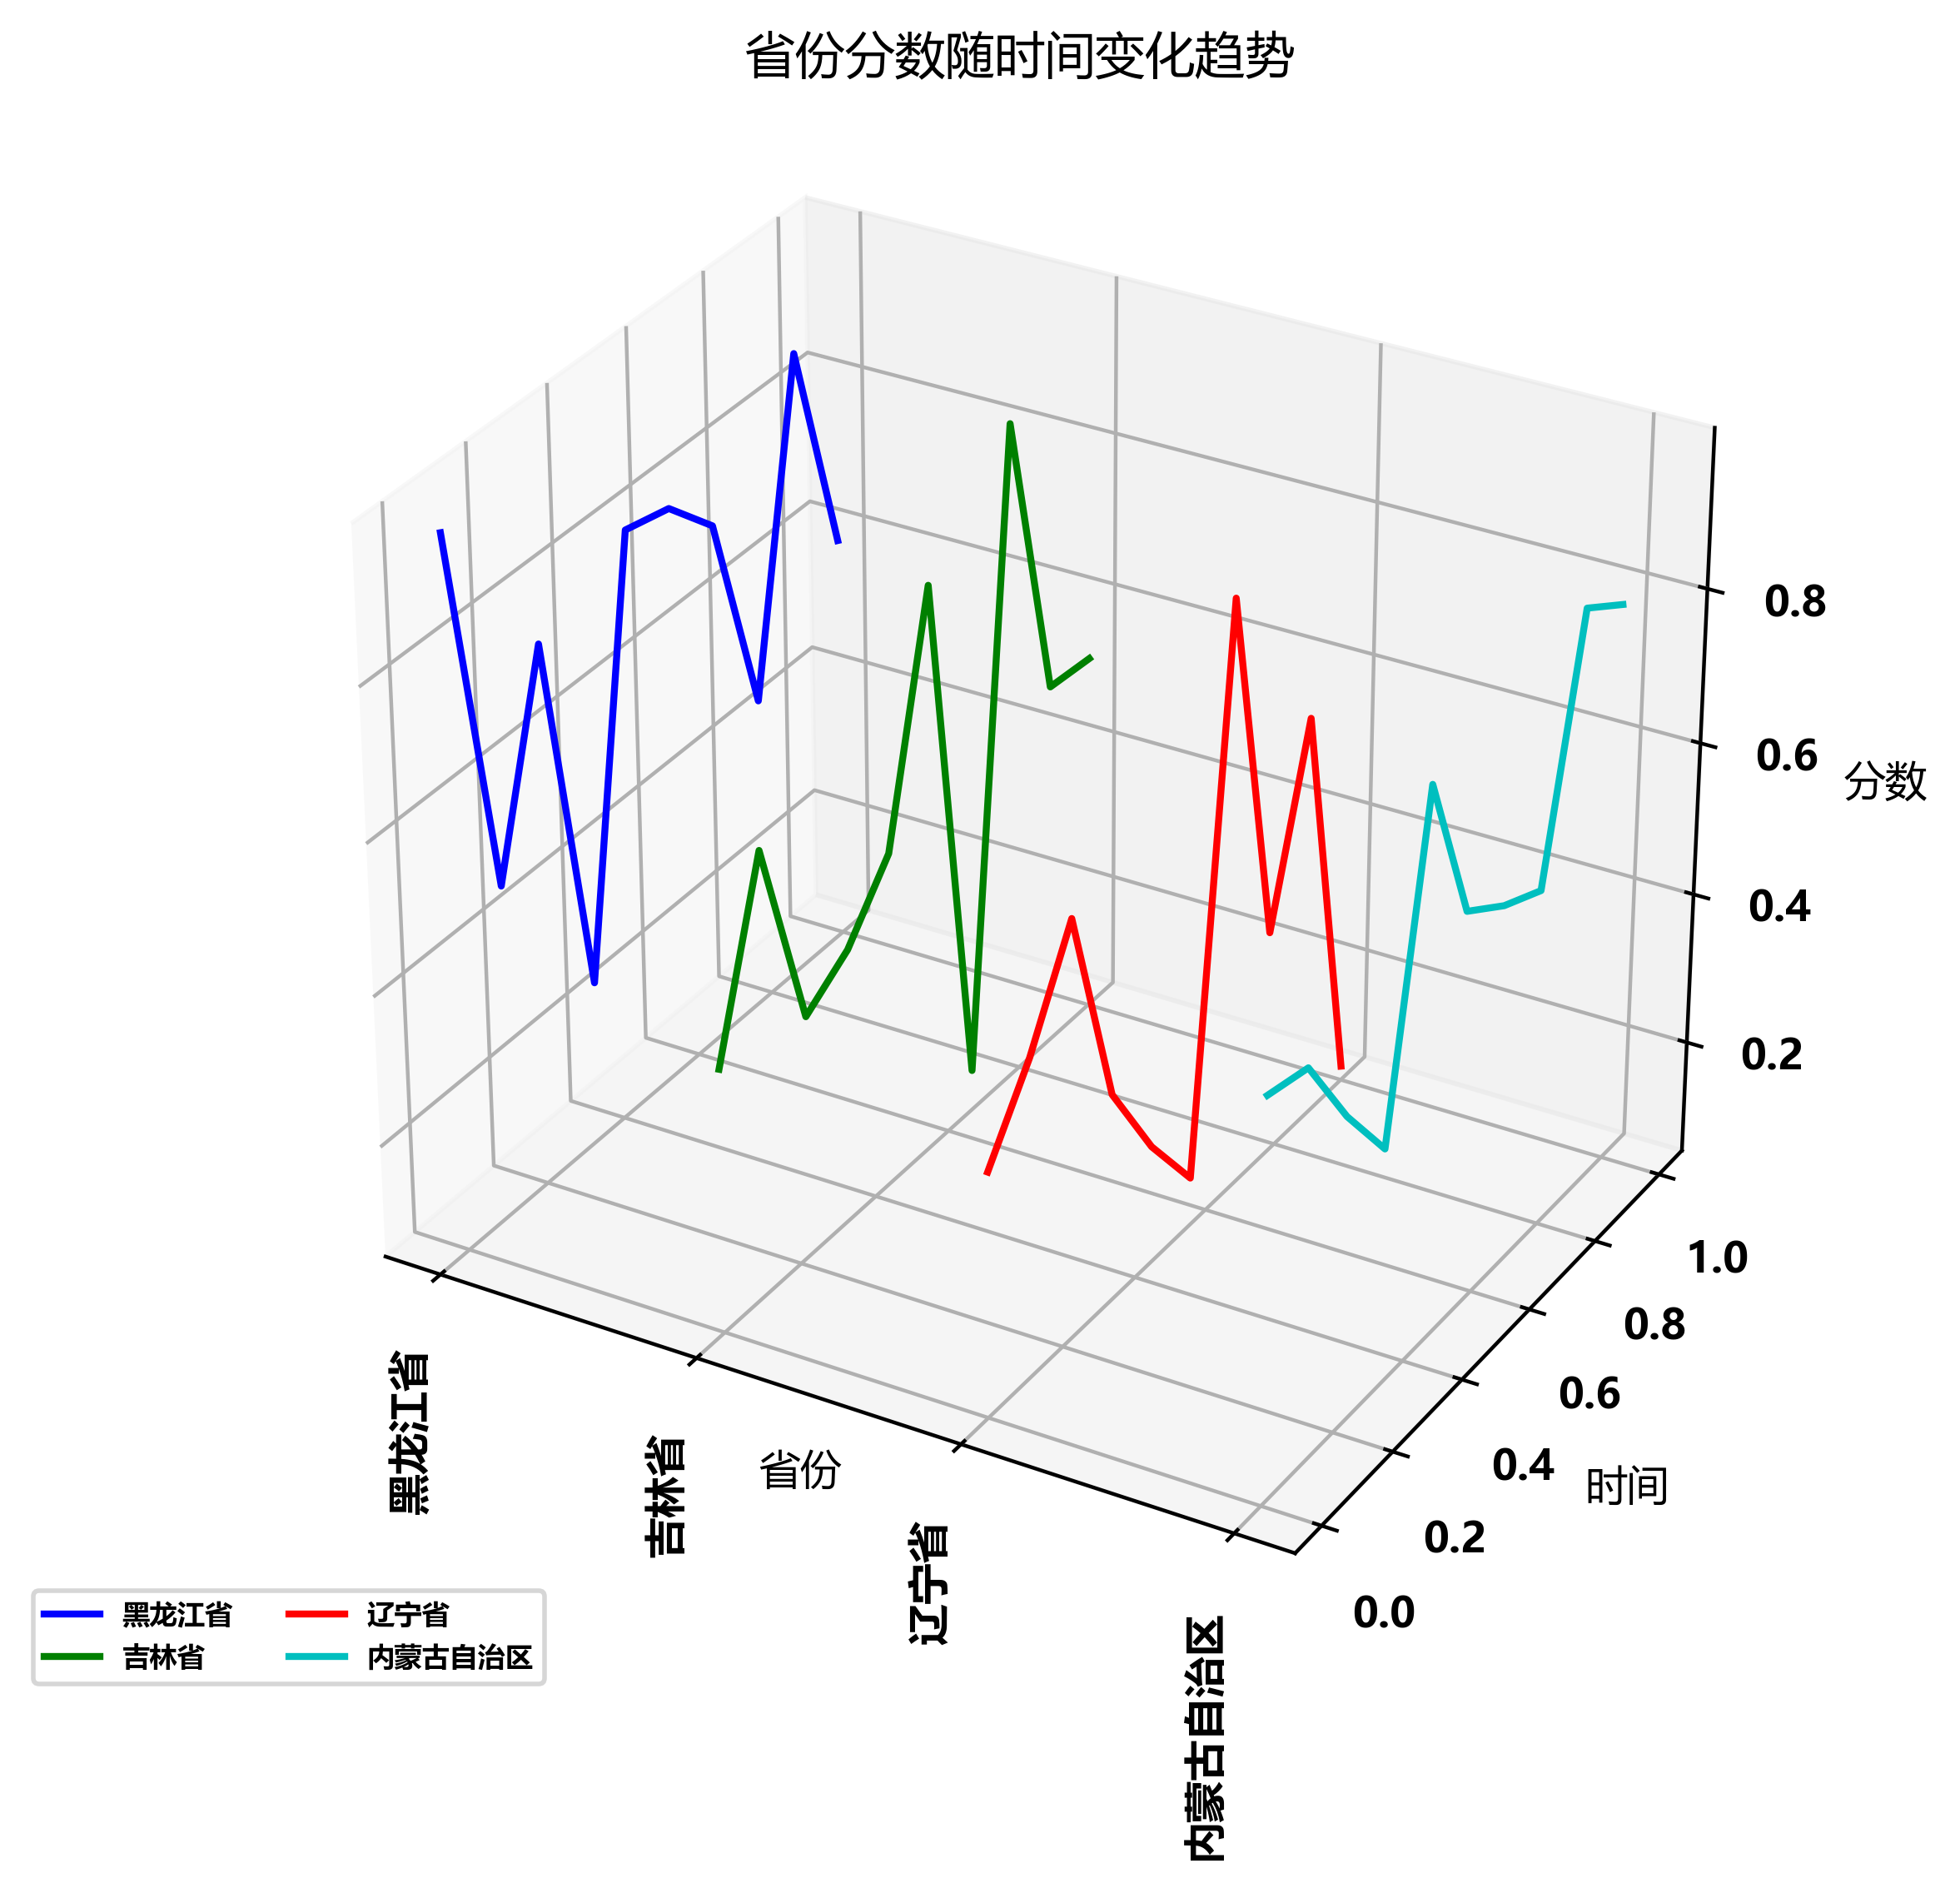

In [52]:
fig = plt.figure(figsize=(8, 6), dpi=400)
# 111表示在画布上只有一个图，即在x、y、z轴上都只有一个图
ax = fig.add_subplot(111, projection='3d')
# 省份列表
provinces = ['黑龙江省', '吉林省', '辽宁省', '内蒙古自治区']
# 省份数目
num_provinces = len(provinces)
# 生成随机数据，假设有 num_provinces 个省份，每个省份有 10 个分数时间点
score_times = np.linspace(0, 1, 10)
data = np.random.rand(num_provinces, 10)

# 将数据中的省份下标转换为对应的数值
x = np.array([i for i in range(data.shape[0])]).repeat(data.shape[1])  # 每个元素重复data.shape[1]遍，并返回一维数组
y = np.tile(score_times, data.shape[0])
z = data.flatten()

# 将数据转换为每个省份对应的三元组
lines_data = []
for i in range(data.shape[0]):
    lines_data.append(list(zip(x[i*10:(i+1)*10], y[i*10:(i+1)*10], z[i*10:(i+1)*10])))

# 绘制折线图
# 绘制折线图
colors = ['b', 'g', 'r', 'c']
for i in range(len(lines_data)):
    xs, ys, zs = zip(*lines_data[i])
    ax.plot(xs, ys, zs, color=colors[i], label=provinces[i])

ax.set_xlabel('省份', labelpad=80)
ax.xaxis.labelpad = -10
ax.set_ylabel('时间')
ax.set_zlabel('分数')
# 显示每个省份名称
ax.set_xticks(range(num_provinces))
ax.set_xticklabels(provinces, rotation=90)
# 设置各轴的比例
ax.set_box_aspect((1, 0.8, 0.8))
plt.title('省份分数随时间变化趋势')
# 添加图例并控制位置,2列
ax.legend(loc='upper left', bbox_to_anchor=(-0.15, 0.04), ncol=2, fontsize=6)
plt.show()

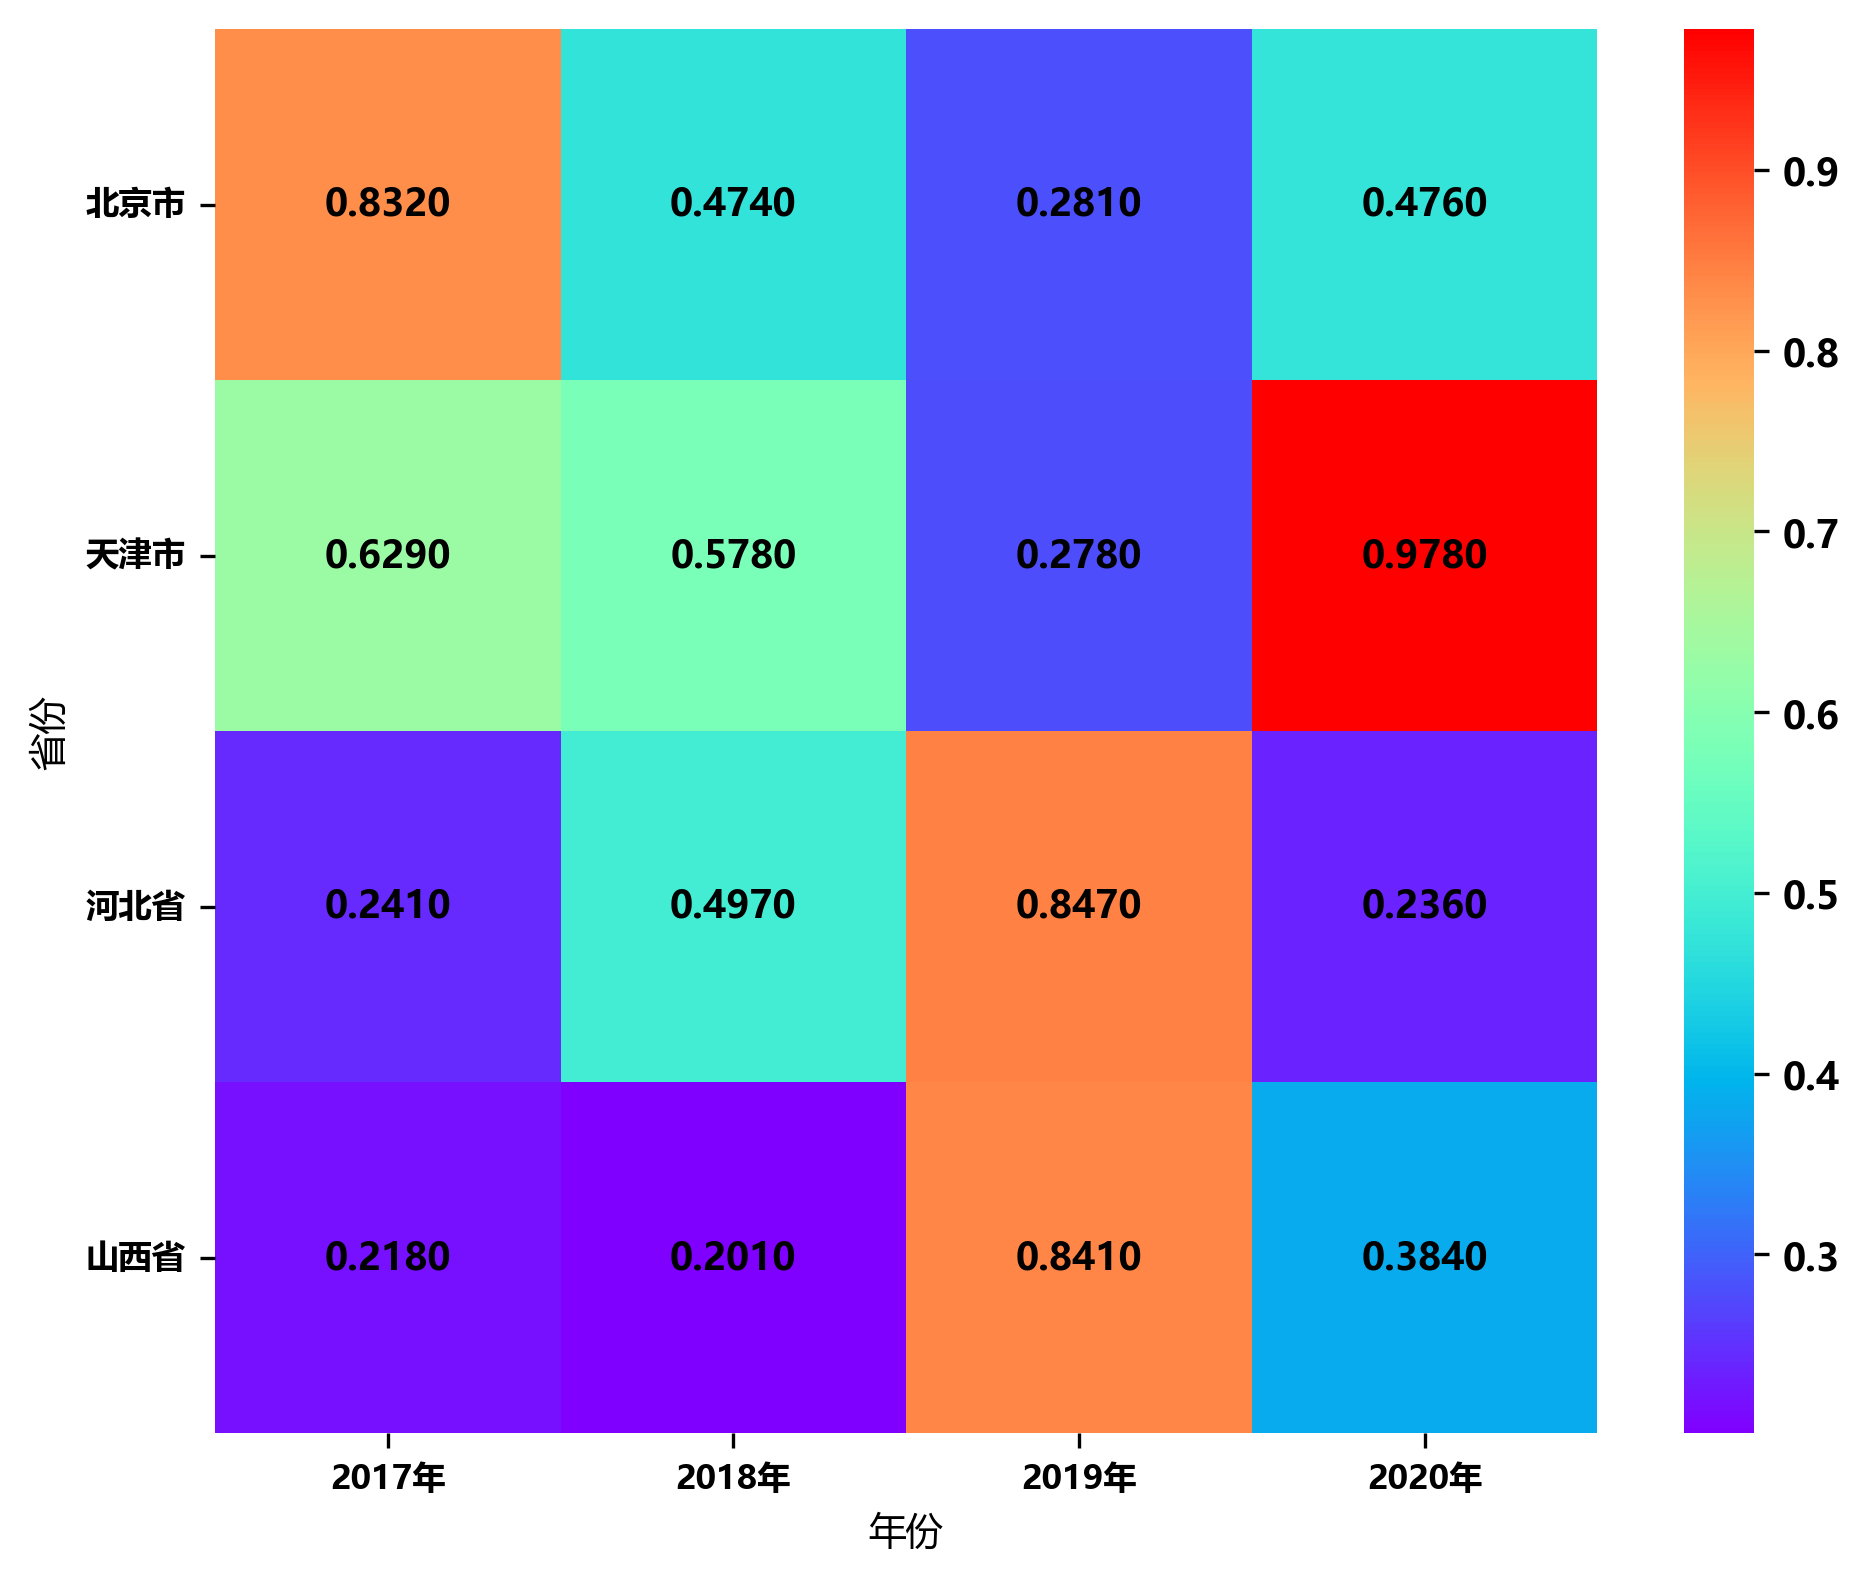

In [40]:
# 创建省份列表
provinces = ['北京市', '天津市', '河北省', '山西省']
# 创建年份列表
years = list(range(2018, 2023))
# 构造数据
data = {'2017年': [], '2018年': [], '2019年': [], '2020年': []}
for province in provinces:
    for key in data:
        # 随机生成数值
        value = np.random.randint(100, 1000)/1000
        data[key].append(value)
# 将数据转换成数据框
data = pd.DataFrame(data, index=provinces)

# 设置图的大小
plt.figure(figsize=(8, 6), dpi=300)
# 绘制热力图 显示数字并保留小数点后四位，数字颜色为黑色
sns.heatmap(data, cmap='rainbow', annot=True, annot_kws={"color": "black"}, fmt='.4f')
# 设置坐标轴标签和刻度
plt.yticks(np.arange(len(provinces))+0.5, provinces, rotation=0, fontsize=8)
plt.xticks(np.arange(len(data.keys()))+0.5, data.keys(), rotation=0, fontsize=8)
plt.xlabel('年份')
plt.ylabel('省份')
plt.subplots_adjust(bottom=0.1, left=0.18)
# 显示图形
plt.show()

In [48]:
from typing import Dict, Optional
def radar_fig(data: Dict[str, np.ndarray], map_name, colour=('y', 'g', 'r', 'c'), labels=("社会", "生态文明", "经济", "创新教育")):
    labels = np.array(labels)
    # 极坐标角度
    dataLenth = len(labels)
    angles = np.linspace(0, 2 * np.pi, dataLenth, endpoint=False)

    # 将数据首尾相接，形成闭合的多边形，并将标签也进行封闭
    for key in data:
        data[key] = np.concatenate((data[key], [data[key][0]]))
    angles = np.concatenate((angles, [angles[0]]))
    labels = np.concatenate((labels, [labels[0]]))

    # 创建极坐标子图
    fig = plt.figure(facecolor="white", dpi=100)
    ax = fig.add_subplot(111, polar=True)
    # 绘制数据线
    for key, color in zip(data.keys(), colour):
        ax.plot(angles, data[key], color=color, linewidth=2, label=key)
        ax.fill(angles, data[key], facecolor=color, alpha=0.25)

    # 设置网格线和角度标签
    ax.set_thetagrids(angles * 180 / np.pi, labels)
    ax.grid(True)

    # 添加图例，并显示图形
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
#     plt.savefig(map_name, dpi=300, bbox_inches='tight')  # 这里有横轴截断问题
    plt.show()

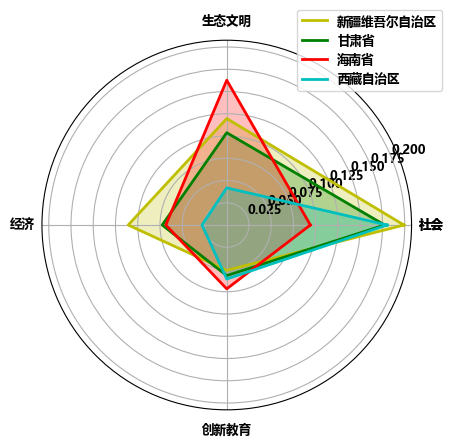

In [49]:
data3 = {"新疆维吾尔自治区": np.array([0.19907975, 0.11961937, 0.11068196, 0.0509375 ]),
         "甘肃省": np.array([0.1774457 , 0.10368976, 0.07252283, 0.05685439]),
         "海南省": np.array([0.09395624, 0.16269076, 0.06845087, 0.07172579]),
         "西藏自治区": np.array([0.18025952, 0.0417305 , 0.02775946, 0.06067187])}

radar_fig(data3, "低水平.png")